<a href="https://colab.research.google.com/github/punkmic/Topic-Modeling-Reclame-Aqui/blob/master/Topic_Modeling_Reclame_Aqui_with_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modeling with Latent Dirichlet Allocation (LDA) - Reclame Aqui**

LDA is an unsupervised learning algorithm which is able to learns about the structure of the data by analyzing the relationships between words and documents. LDA is based on the idea that each document in a collection can be represented as a mixture of a small number of topics, and that each topic is a distribution over the words in the vocabulary. The model estimates the probability of each word in a document given the topics present in that document, and it also estimates the probability of each topic given the words in the document.

Reference: BLEI, D. M. 2012 Probabilistic topic models. Communications of the ACM, 55(4): pp.77_84.


### **Load data from [Github](https://github.com/punkmic/Topic-Modeling-Reclame-Aqui.git)**

#### **Load dependecies**

In [47]:
%%capture
try:
  import pandas as pd # for data manipulation
  import os # for interacting with the operating system
  from sklearn.cluster import KMeans
  import matplotlib.ticker as ticker
  from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
  import pyLDAvis.gensim_models as gs
  from sklearn.metrics import silhouette_score
  import matplotlib.pyplot as plt
  import pickle
  import csv
  import optuna # for hyperparameter optimization
  import pyLDAvis
  from gensim.utils import simple_tokenize
  from gensim.models import LdaMulticore
  from gensim.utils import simple_preprocess
  from gensim import models
  from gensim.corpora import Dictionary
  from gensim.models.coherencemodel import CoherenceModel
  from gensim.models.phrases import Phrases, Phraser
  from wordcloud import WordCloud
except:
  !pip install gensim
  !pip install pyldavis
  !pip install optuna
  !pip install wordcloud
  from gensim import models
  from gensim.corpora import Dictionary
  from gensim.models.coherencemodel import CoherenceModel
  from gensim.models import LdaMulticore
  from gensim.utils import simple_preprocess
  import optuna # for hyperparameter optimization

In [2]:
WORK_DIR = '/content/Topic-Modeling-Reclame-Aqui'
DATASETS_DIR = '/content/Topic-Modeling-Reclame-Aqui/datasets'
LDA_RESULTS_DIR = '/content/Topic-Modeling-Reclame-Aqui/lda'

#### **Github**

In [ ]:
! ssh-keygen -t rsa -b 4096
# Add github.com to our known hosts
! ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
# Restrict the key permissions, or else SSH will complain.
! chmod go-rwx /root/.ssh/id_rsa

In [5]:
! cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDjT1t8OFmyAG/t1C31r1+z+jMXx7VazCVn96HdyOCfKcPU3jZS0WQaRp3ZZATJtpvcs2tCenLMPPkq7L1/TqimgFzbwGZsDfa98m8xXFEpp0XJTH14N6MXWasTNKTEr+Dllf2hlAM4sbjEEZBNZq4fX/ojwoF3Vfo8T1ZFIl0TP3qXSxdn4xhLoHUwBMmZj5c4HdMMPSKXVUX/hEmuhJI/kRaBMexYdUaFYrF5vpLs9L7aiXS0xacIo7bPLOr1QO21NgvNXeGmX8Ltl1/qyd+0nlr/WxAtGbR5N4zMClpWdr9XpOZN65YZcBBIiKaV9aOREMJfPQkivF4843+zYM9rX0MkWHRjj/98HRrvCtFXDyVrg1nBpJ+k0CkD45+FwuYKLk2IOi9+qVo93v98sXYSEkhvmVthR69YGpsMmz9GkOkWrH2WP+y60muY9eKKpJvBOfURkjjIHKrgPT9KYvOyDa0zD+3pMps/+5hpUNH/NuU8L12wlKdTWnCmPZgGo4fst9Ot7a3lNKQ4IvxLPAKq9aMJ67M57Acy4a1KLmJRvwmx//HKX4zPh/NRvC21HNVGUEV5F32/50FqYiJ+m3qoKk752RMcjowoGFElu2+HV7s7RHpIOqdV7a7weKzYG82Qizy7N1nHp8K6aXfeQKQ1hjmPFNofsGZZ4rX6VbAIoQ== root@b0658d6d4cde


In [6]:
!git config --global user.email "mattheus_ribeiro@oulook.com"
!git config --global user.name "punkmic"

In [7]:
!ssh -T git@github.com

Hi punkmic! You've successfully authenticated, but GitHub does not provide shell access.


In [8]:
!git clone git@github.com:punkmic/Topic-Modeling-Reclame-Aqui.git

Cloning into 'Topic-Modeling-Reclame-Aqui'...
remote: Enumerating objects: 16404, done.
remote: Counting objects: 100% (2223/2223), done.
remote: Compressing objects: 100% (1844/1844), done.
remote: Total 16404 (delta 364), reused 2182 (delta 344), pack-reused 14181
Receiving objects: 100% (16404/16404), 141.35 MiB | 8.64 MiB/s, done.
Resolving deltas: 100% (1512/1512), done.
Checking out files: 100% (14826/14826), done.


In [ ]:
%cd /content/Topic-Modeling-Reclame-Aqui/

[Errno 2] No such file or directory: '/content/Topic-Modeling-Reclame-Aqui/'
/content


#### **Load dataset**

In [9]:
DATASET_VERSION = 'v1'

In [10]:
df = pd.read_csv(os.path.join(DATASETS_DIR, f'preprocessed_{DATASET_VERSION}.csv'))

In [11]:
df.head()

,title,documents,words,bigrams,noun_bigrams,trigrams,noun_trigrams
0,pedir cancelado justificativa semana compro,pesquisando bastante novo comprar resolver agu...,"['pesquisando', 'bastante', 'novo', 'comprar',...","[('pesquisando', 'bastante'), ('bastante', 'no...","[('pesquisando', 'bastante'), ('bastante', 'no...","[('pesquisando', 'bastante', 'novo'), ('bastan...","[('pesquisando', 'bastante', 'novo'), ('novo',..."
1,pedir cancelar,sinceramente decepcionar entrar contato procon...,"['sinceramente', 'decepcionar', 'entrar', 'con...","[('sinceramente', 'decepcionar'), ('decepciona...","[('sinceramente', 'decepcionar'), ('decepciona...","[('sinceramente', 'decepcionar', 'entrar'), ('...","[('sinceramente', 'decepcionar', 'entrar'), ('..."
2,cobrança indever,cancelei plano antes terminar período testir g...,"['cancelei', 'plano', 'antes', 'terminar', 'pe...","[('cancelei', 'plano'), ('plano', 'antes'), ('...","[('cancelei', 'plano'), ('terminar', 'período'...","[('cancelei', 'plano', 'antes'), ('plano', 'an...","[('cancelei', 'plano', 'antes'), ('terminar', ..."
3,pedir reincidente,olhar compra vir errar vir errar novamente fal...,"['olhar', 'compra', 'vir', 'errar', 'vir', 'er...","[('olhar', 'compra'), ('compra', 'vir'), ('vir...","[('olhar', 'compra'), ('compra', 'vir'), ('vir...","[('olhar', 'compra', 'vir'), ('compra', 'vir',...","[('olhar', 'compra', 'vir'), ('compra', 'vir',..."
4,assinaturar vender,inscrevi realizar venda cadastro plano individ...,"['inscrevi', 'realizar', 'venda', 'cadastro', ...","[('inscrevi', 'realizar'), ('realizar', 'venda...","[('inscrevi', 'realizar'), ('realizar', 'venda...","[('inscrevi', 'realizar', 'venda'), ('realizar...","[('inscrevi', 'realizar', 'venda'), ('realizar..."


## **KMeans Model**

#### **K-Means elbow**

The elbow method is a type of method for checking the consistency of clusters created. It  finds the ideal number of clusters in data. Explained variance considers the percentage of variance explained and derives an ideal number of clusters. 

In [12]:
if not os.path.exists(LDA_RESULTS_DIR):
    os.makedirs(LDA_RESULTS_DIR)

In [15]:
# convert text documents to bag of words representation
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['documents'])

In [21]:
def plot_elbow(n_clusters= 20):
  elbow_method = {}
  for k in range(1, n_clusters):
    kmeans_elbow = KMeans(n_clusters=k).fit(x)
    elbow_method[k] = kmeans_elbow.inertia_

  # plot elbow
  plt.figure(figsize=[8, 8])
  plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
  plt.title('Elbow', fontsize=16)
  plt.xlabel('Número de grupos')
  plt.ylabel('Soma de quadrados dentro do cluster')

  # save plot
  plt.savefig(os.path.join(LDA_RESULTS_DIR, f'elbow_{n_clusters}_{DATASET_VERSION}.png'))

  # show the plot
  plt.show()

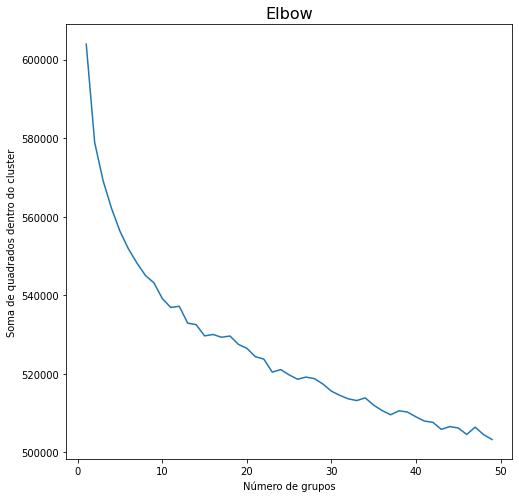

In [22]:
plot_elbow(50)

#### **Silhouette**

The silhouette coefficient, or silhouette score, tells how much the object is similar to  other clusters compared to its own cluster. The value varies from –1 to 1, where a high  value indicates that the cluster fits well with itself, and the cluster does not match the neighboring cluster.

In [38]:
silhouette = {}
for n_cluster in range(2, 15):
  kmeans = KMeans(n_clusters=n_cluster).fit(x)
  label = kmeans.labels_
  sil_coeff = silhouette_score(x, label, metric='euclidean')
  print(f"Number of clusters={n_cluster}, Silhouette Coefficient is {sil_coeff}")
  silhouette[n_cluster] = sil_coeff

Number of clusters=2, Silhouette Coefficient is 0.27867207189684534
Number of clusters=3, Silhouette Coefficient is 0.146336529004156
Number of clusters=4, Silhouette Coefficient is 0.12912287284234206
Number of clusters=5, Silhouette Coefficient is 0.11413397894224983
Number of clusters=6, Silhouette Coefficient is 0.04149383180278905
Number of clusters=7, Silhouette Coefficient is 0.02648845560948271
Number of clusters=8, Silhouette Coefficient is 0.021740418015772842
Number of clusters=9, Silhouette Coefficient is 0.02218547992933549
Number of clusters=10, Silhouette Coefficient is 0.013469645345387889
Number of clusters=11, Silhouette Coefficient is 0.0076715420236785035
Number of clusters=12, Silhouette Coefficient is -0.00914068078008345
Number of clusters=13, Silhouette Coefficient is 0.010776664416301667
Number of clusters=14, Silhouette Coefficient is 0.00048062518985815495


In [39]:
pd.DataFrame(silhouette, columns=['clusters', 'score']).to_csv(os.path.join(LDA_RESULTS_DIR, f'silhouette_scores.csv'), index=False)

#### **Clustering model**

In [20]:
segments = KMeans(n_clusters=2)
segments.fit(x)

output = segments.labels_.tolist()
output_df = pd.DataFrame({'texts': df['documents'], 'cluster': output})

output_df['cluster'] = segments.labels_.tolist()

cluster_1 = output_df[output_df.cluster == 1]
cluster_0 = output_df[output_df.cluster == 0]

**Wordcloud of cluster 1**

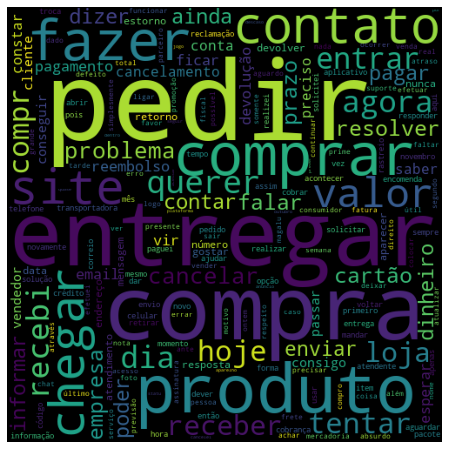

In [26]:
wordcloud = WordCloud(width = 500, height = 500,
                      collocations = False, 
                      colormap='viridis', 
                      random_state=20).generate_from_text(' '.join(cluster_1['texts']))
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Wordcloud of cluster 0**

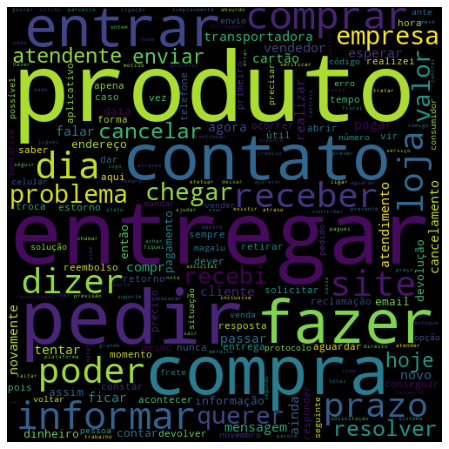

In [27]:
wordcloud = WordCloud(width = 500, height = 500,
                      collocations = False,
                      colormap='viridis',
                      random_state=20).generate_from_text(' '.join(cluster_0['texts']))
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **LDA models**

#### **Plot coherence**

In [40]:
def plot_coherence(coherence_scores, n_topics, prefix):
  # create the plot
  plt.figure(figsize=[10, 8])
  plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), color='tab:red')

  # add labels to the axes
  plt.xlabel('Número de Tópicos')
  plt.ylabel('Coerência (score)')
  plt.title("Coerência por número de tópicos", fontsize=16)

  # save plot
  plt.savefig(os.path.join(LDA_RESULTS_DIR, f'{prefix}_coherence_by_topics_{n_topics}_{DATASET_VERSION}.png'))

  # show the plot
  plt.show()

In [30]:
NUMBER_OF_TOPICS = 15

#### **Unigram LDA**

In [61]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Tokenize the text data
tokens = [simple_preprocess(doc) for doc in df.documents.values]

# Create a dictionary from the tokens
dictionary = Dictionary(tokens)

# Create a corpus from the bigrams
corpus = [dictionary.doc2bow(token) for token in tokens]

# Create a dict to store the coherence scores
coherence_scores = {}

# Create LDA models for different number of topics
for num_topics in range(2, NUMBER_OF_TOPICS):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary, 
                             num_topics=num_topics,
                             random_state=100,
                             passes=2,
                             iterations=100)
    
    coherence_model = CoherenceModel(model=lda_model, 
                                     texts=tokens,
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    
    coherence_scores[num_topics] = coherence_model.get_coherence()

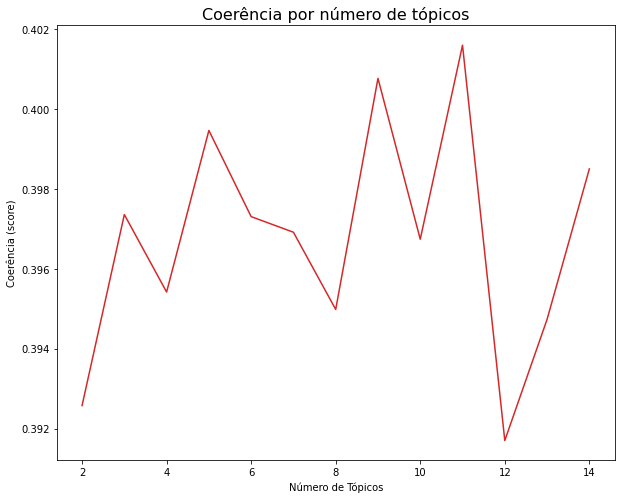

In [62]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'unigrams')

#### **Bigrams LDA**

In [63]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Tokenize the text data
tokens = [simple_preprocess(doc) for doc in df.documents.values]

# create bigrams
bigram = Phrases(tokens, min_count=1, threshold=1)
bigram_phraser = Phraser(bigram)
texts = [bigram_phraser[doc] for doc in tokens]

# create a dictionary from the bigrams
dictionary = Dictionary(texts)

# create a corpus from the bigrams
corpus = [dictionary.doc2bow(text) for text in texts]

# create a dict to store the coherence scores
coherence_scores = {}

# create LDA models for different number of topics
for num_topics in range(2, NUMBER_OF_TOPICS):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary, 
                             num_topics=num_topics,
                             random_state=100,
                             passes=2,
                             iterations=100)
    
    coherence_model = CoherenceModel(model=lda_model, 
                                     texts=texts,
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    
    coherence_scores[num_topics] = coherence_model.get_coherence()

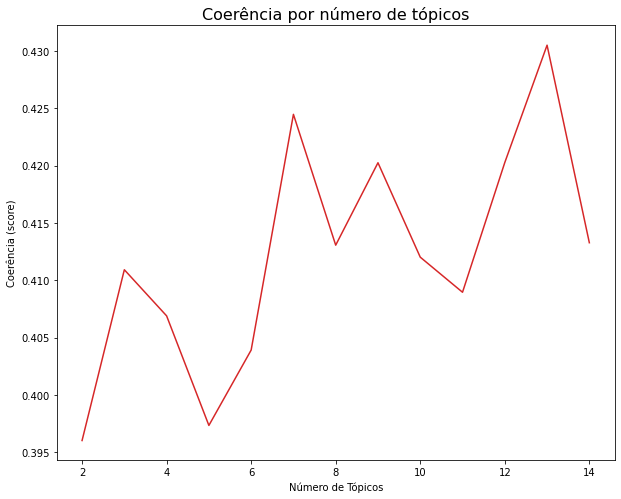

In [64]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'bigrams')

#### **Trigrams LDA**

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Tokenize the text data
tokens = [simple_preprocess(doc) for doc in df.documents.values]

# Create trigrams
trigram = Phrases(tokens, min_count=1, threshold=1)
trigram_phraser = Phraser(trigram)
texts = [trigram_phraser[bigram_phraser[doc]] for doc in tokens]

# create a dictionary from the trigrams
dictionary = Dictionary(texts)

# create a corpus from the trigrams
corpus = [dictionary.doc2bow(text) for text in texts]

# create a dict to store the coherence scores
coherence_scores = {}

# create LDA models for different number of topics
for num_topics in range(2, NUMBER_OF_TOPICS):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary, 
                             num_topics=num_topics,
                             random_state=100,
                             passes=2,
                             iterations=100)
    
    coherence_model = CoherenceModel(model=lda_model, 
                                     texts=texts,
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    
    coherence_scores[num_topics] = coherence_model.get_coherence()

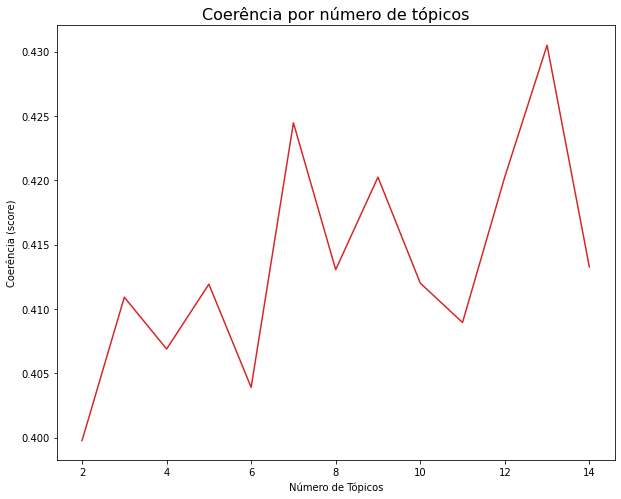

In [43]:
plot_coherence(coherence_scores, NUMBER_OF_TOPICS, 'trigrams')

#### **Hyperparameter tuning**

In [65]:
def optimizer(trial):
   alpha = trial.suggest_float('lda_alpha', 0.01, 1.0)
   eta = trial.suggest_float('lda__eta', 0.01, 1.0)

   nr_topics = trial.suggest_int('lda__nr_topics', 2, 50)

   # tokenize the text data
   tokens = [simple_preprocess(doc) for doc in df.documents]

   # Create trigrams
   trigram = Phrases(tokens, min_count=1, threshold=1)
   trigram_phraser = Phraser(trigram)
   texts = [trigram_phraser[bigram_phraser[doc]] for doc in tokens]
  
   # create a corpus from a list of texts
   dictionary = Dictionary(texts)
   corpus = [dictionary.doc2bow(text) for text in texts]

   # create a new LDA model
   lda_model = LdaMulticore(corpus=corpus,
                           id2word=dictionary,
                           num_topics=nr_topics,
                           random_state=100,
                           passes=2,
                           iterations=100,
                           alpha=alpha,
                           eta=eta)
  
   score = CoherenceModel(lda_model, texts=texts, corpus=corpus, dictionary=dictionary).get_coherence()

   # save scores

   if not os.path.exists(LDA_RESULTS_DIR):
     os.makedirs(LDA_RESULTS_DIR)

   with open(os.path.join(LDA_RESULTS_DIR, f'coherence_scores_{DATASET_VERSION}.csv'), 'a', newline='') as f:
     fieldnames = ['score', 'tópicos', 'alpha', 'eta']
     writer = csv.DictWriter(f, fieldnames=fieldnames)
     data = [{'score': score,
             'tópicos': nr_topics, 
             'alpha': alpha,
             'eta': eta}]
     writer.writerows(data)
   return  1 - score

In [66]:
%%time
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
NUMBER_OF_MODELS = 20
# create a new study
study = optuna.create_study(study_name=f'LDA_{DATASET_VERSION}')

# run the optmize function 
study.optimize(optimizer, n_trials=NUMBER_OF_MODELS)

# best
print('Best value %s', study.best_value)
print('Best params: %s', study.best_params)

Best value %s 0.5189621724638205
Best params: %s {'lda_alpha': 0.17624935776984868, 'lda__eta': 0.47622333499787867, 'lda__nr_topics': 32}
CPU times: user 11min 32s, sys: 32.1 s, total: 12min 4s
Wall time: 13min 21s


In [67]:
filename = os.path.join(LDA_RESULTS_DIR, f'coherence_scores_{DATASET_VERSION}.csv')
scores = pd.read_csv(filename, header=None)
scores.columns = ['score', 'topics', 'alpha', 'eta']
scores.to_csv(filename, index=False)
scores.head()

,score,topics,alpha,eta
0,0.396955,50,0.753341,0.673877
1,0.408791,10,0.012519,0.732757
2,0.401278,41,0.297923,0.658251
3,0.424499,24,0.430131,0.691822
4,0.395771,40,0.794165,0.370513


#### **Visualization of Topics**

In [72]:
NUMBER_OF_TOPICS = 6

In [73]:
def save_lda_vis(prefix, lda, nr_topics, corpus, dictionary):
  path = os.path.join(LDA_RESULTS_DIR, f'ldavis_{str(nr_topics)}_{DATASET_VERSION}')

  vis = gs.prepare(lda, corpus, dictionary)
 
  with open(path, 'wb') as f:
        pickle.dump(vis, f)

  with open(path, 'rb') as f:
    vis = pickle.load(f)
  
  pyLDAvis.save_html(vis, os.path.join(LDA_RESULTS_DIR, f'{prefix}_ldavis_{str(nr_topics)}_{DATASET_VERSION}.html'))

In [74]:
# tokenize the text data
texts = [simple_preprocess(doc) for doc in df.documents]

# create a corpus from a list of texts
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# create a new LDA model
lda_model = LdaMulticore(corpus=corpus,
                           id2word=dictionary,
                           num_topics=NUMBER_OF_TOPICS,
                           random_state=100,
                           passes=2,
                           iterations=100)

save_lda_vis('unigram', lda_model, NUMBER_OF_TOPICS, corpus, dictionary)

vis = gs.prepare(lda_model, corpus, dictionary)
gs.pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


#### **Cluster 0 topics visualization**

In [75]:
texts = [simple_preprocess(doc) for doc in cluster_0.texts]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# create a new LDA model
lda_model = LdaMulticore(corpus=corpus,
                           id2word=dictionary,
                           num_topics=NUMBER_OF_TOPICS,
                           random_state=100,
                           passes=2,
                           iterations=100)

save_lda_vis('cluster_0', lda_model, NUMBER_OF_TOPICS, corpus, dictionary)

vis = gs.prepare(lda_model, corpus, dictionary)
gs.pyLDAvis.display(vis)

#### **Cluster 1 topics visualization**

In [76]:
texts = [simple_preprocess(doc) for doc in cluster_1.texts]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# create a new LDA model
lda_model = LdaMulticore(corpus=corpus,
                           id2word=dictionary,
                           num_topics=NUMBER_OF_TOPICS,
                           random_state=100,
                           passes=2,
                           iterations=100)

save_lda_vis('cluster_1', lda_model, NUMBER_OF_TOPICS, corpus, dictionary)

vis = gs.prepare(lda_model, corpus, dictionary)
gs.pyLDAvis.display(vis)

In [58]:
def get_topics(lda, nr_topics):
  x=lda.show_topics(num_topics=nr_topics, num_words=10, formatted=False)
  topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
  topics = []
  words = []
  for t, w in topics_words:
    topics.append(t)
    words.append(w)
  return pd.DataFrame({'Tópicos': topics, 'Words': words})

In [59]:
def get_words(lda, topics):
  words = []
  for topic_id, topic in enumerate(topics):
    topic_words = [dictionary[word_id] for word_id, prob in lda.get_topic_terms(topic_id, topn=10)]
    words.append(topic_words)
  return words

In [ ]:
topics_terms = get_topics(lda_model, NUMBER_OF_TOPICS)
topics_terms.to_csv(os.path.join(LDA_RESULTS_DIR, f'topics_terms_{DATASET_VERSION}.csv'), index=False)
topics_terms.head(NUMBER_OF_TOPICS)

,Tópicos,Words
0,0,"[compra, cartão, crédito, fazer, contar, pois,..."
1,1,"[pedir, compra, contato, fazer, email, resolve..."
2,2,"[produto, pedir, garrafa, compra, chegar, rece..."
3,3,"[produto, pedir, entregar, compra, dia, contat..."
4,4,"[entregar, transportadora, pedir, data, produt..."
